In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from sklearn.datasets import *
from matplotlib import colors
from torch import optim
from sklearn.model_selection import train_test_split

In [4]:
digits = sklearn.datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [28]:
print(digits.target[:50])

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0]


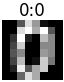

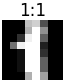

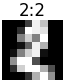

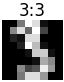

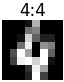

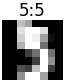

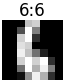

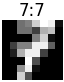

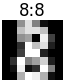

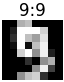

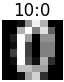

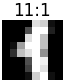

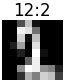

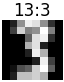

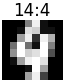

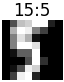

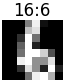

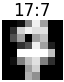

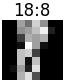

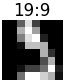

In [29]:
plt.rcParams['figure.dpi'] = 20
plt.rcParams['font.size'] = 50
for i in range(20):
    plt.imshow(digits.images[i], cmap='gray')
    plt.axis("off")
    plt.title(str(i) + ":" + str(digits.target[i]))
    plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
xy = train_test_split(digits.data, digits.target)
xy

[array([[ 0.,  1., 14., ...,  2.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        [ 0.,  1., 14., ..., 16., 15.,  5.],
        ...,
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16., 12.,  0.],
        [ 0.,  0.,  0., ..., 11.,  0.,  0.]]),
 array([[ 0.,  0.,  6., ...,  1.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  6.,  0.],
        [ 0.,  0., 14., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  2., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.]]),
 array([8, 7, 2, ..., 4, 9, 4]),
 array([5, 9, 8, 2, 8, 6, 8, 4, 1, 3, 3, 1, 4, 6, 5, 6, 7, 8, 1, 5, 4, 3,
        0, 2, 1, 3, 0, 8, 6, 7, 4, 5, 2, 0, 4, 7, 7, 0, 8, 5, 7, 8, 7, 7,
        3, 1, 5, 4, 6, 9, 1, 7, 3, 7, 5, 9, 1, 9, 0, 1, 8, 5, 5, 8, 5, 6,
        3, 4, 3, 1, 6, 4, 9, 3, 4, 1, 0, 4, 5, 6, 3, 9, 1, 4, 7, 4, 8, 7,
        4, 1, 4, 4, 3, 5, 3, 6, 4, 8, 9, 8, 5, 0, 1, 9, 8, 8, 3, 8, 3, 6,
        6, 4, 3, 5, 9, 5, 9

In [39]:
lr = LogisticRegression(max_iter=100000)
lr.fit(xy[0], xy[2])
print(lr.score(xy[0], xy[2]), lr.score(xy[1], xy[3]))

1.0 0.9688888888888889


In [40]:
from sklearn.svm import SVC
svc = SVC()
lr.fit(xy[0], xy[2])
print(lr.score(xy[0], xy[2]), lr.score(xy[1], xy[3]))

1.0 0.9688888888888889


In [65]:
import torch
from torch import nn
from torch import tensor
from torch.nn import Module
import torch.nn.functional as F
x_1 = tensor(digits.images, dtype=torch.float)
x_1_1 = tensor(digits.data, dtype=torch.float)
y_1 = tensor(digits.target, dtype=torch.long)
x_1

tensor([[[ 0.,  0.,  5.,  ...,  1.,  0.,  0.],
         [ 0.,  0., 13.,  ..., 15.,  5.,  0.],
         [ 0.,  3., 15.,  ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11.,  ..., 12.,  7.,  0.],
         [ 0.,  2., 14.,  ..., 12.,  0.,  0.],
         [ 0.,  0.,  6.,  ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  ...,  5.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  9.,  0.,  0.],
         [ 0.,  0.,  3.,  ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1.,  ...,  6.,  0.,  0.],
         [ 0.,  0.,  1.,  ...,  6.,  0.,  0.],
         [ 0.,  0.,  0.,  ..., 10.,  0.,  0.]],

        [[ 0.,  0.,  0.,  ..., 12.,  0.,  0.],
         [ 0.,  0.,  3.,  ..., 14.,  0.,  0.],
         [ 0.,  0.,  8.,  ..., 16.,  0.,  0.],
         ...,
         [ 0.,  9., 16.,  ...,  0.,  0.,  0.],
         [ 0.,  3., 13.,  ..., 11.,  5.,  0.],
         [ 0.,  0.,  0.,  ..., 16.,  9.,  0.]],

        ...,

        [[ 0.,  0.,  1.,  ...,  1.,  0.,  0.],
         [ 0.,  0., 13.,  ...,  2.,  1.,  0.]

In [66]:
y_1

tensor([0, 1, 2,  ..., 8, 9, 8])

In [46]:
class MLP_6261(Module):
    def __init__(self):
        super(MLP_6261, self).__init__()
        self.l1 = nn.Linear(64, 256)
        self.l2 = nn.Linear(256, 128)
        self.l3 = nn.Linear(128, 64)
        self.l4 = nn.Linear(64, 10)
    def forward(self, input):
        x = F.relu(self.l1(input))
        x = F.dropout(F.relu(self.l2(x)), p=0.2)
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return F.softmax(x, dim=1)

model1 = MLP_6261()
model1

MLP_6261(
  (l1): Linear(in_features=64, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=64, bias=True)
  (l4): Linear(in_features=64, out_features=10, bias=True)
)

In [58]:
y_1_1 = model1(x_1_1)
for t_p, t_r in zip(y_1_1, digits.target):
    print(torch.argmax(t_p), t_r)

tensor(1) 0
tensor(2) 1
tensor(2) 2
tensor(3) 3
tensor(6) 4
tensor(1) 5
tensor(3) 6
tensor(2) 7
tensor(3) 8
tensor(3) 9
tensor(5) 0
tensor(1) 1
tensor(3) 2
tensor(4) 3
tensor(3) 4
tensor(4) 5
tensor(4) 6
tensor(3) 7
tensor(2) 8
tensor(3) 9
tensor(5) 0
tensor(1) 1
tensor(3) 2
tensor(1) 3
tensor(3) 4
tensor(4) 5
tensor(6) 6
tensor(4) 7
tensor(1) 8
tensor(3) 9
tensor(4) 0
tensor(3) 9
tensor(1) 5
tensor(3) 5
tensor(6) 6
tensor(4) 5
tensor(1) 0
tensor(3) 9
tensor(4) 8
tensor(4) 9
tensor(2) 8
tensor(8) 4
tensor(1) 1
tensor(8) 7
tensor(5) 7
tensor(1) 3
tensor(4) 5
tensor(1) 1
tensor(3) 0
tensor(5) 0
tensor(4) 2
tensor(6) 2
tensor(4) 7
tensor(0) 8
tensor(2) 2
tensor(5) 0
tensor(2) 1
tensor(4) 2
tensor(6) 6
tensor(2) 3
tensor(3) 3
tensor(3) 7
tensor(1) 3
tensor(2) 3
tensor(4) 4
tensor(3) 6
tensor(6) 6
tensor(4) 6
tensor(8) 4
tensor(4) 9
tensor(6) 1
tensor(4) 5
tensor(3) 0
tensor(3) 9
tensor(3) 5
tensor(2) 2
tensor(3) 8
tensor(1) 2
tensor(4) 0
tensor(4) 0
tensor(2) 1
tensor(3) 7
tensor(3) 6
tens

In [80]:
y_1_1_np = y_1_1.cpu().detach().numpy()
y_1_2_np = np.array([np.argmax(t) for t in y_1_1_np])

print(digits.target)
print(y_1_2_np)
print(np.sum(digits.target == y_1_2_np))
print(len(y_1_2_np))
print(np.sum(digits.target == y_1_2_np) / len(y_1_2_np))

[0 1 2 ... 8 9 8]
[1 2 2 ... 3 5 3]
236
1797
0.13132999443516974


In [61]:
train_x, test_x, train_y, test_y = train_test_split(x_1_1, y_1, random_state=123, test_size=0.3)
test_y

tensor([3, 3, 4, 4, 1, 3, 1, 0, 7, 4, 0, 0, 5, 1, 6, 0, 3, 1, 0, 6, 9, 7, 7, 5,
        4, 5, 7, 0, 0, 9, 1, 6, 8, 6, 8, 4, 6, 2, 1, 6, 0, 6, 2, 0, 2, 3, 5, 8,
        8, 8, 2, 8, 6, 5, 1, 6, 4, 6, 0, 4, 3, 5, 6, 2, 8, 8, 8, 2, 0, 1, 7, 9,
        4, 7, 3, 9, 4, 3, 3, 8, 9, 5, 4, 6, 1, 2, 4, 2, 4, 5, 8, 4, 1, 7, 6, 7,
        5, 5, 6, 3, 9, 4, 6, 6, 8, 1, 7, 5, 6, 4, 9, 8, 7, 0, 9, 0, 2, 9, 0, 5,
        1, 4, 4, 2, 2, 0, 7, 3, 6, 8, 2, 5, 2, 3, 3, 9, 6, 7, 4, 0, 7, 3, 2, 2,
        2, 3, 8, 1, 7, 1, 5, 7, 9, 1, 3, 2, 6, 0, 7, 9, 6, 0, 2, 6, 3, 1, 5, 5,
        9, 6, 1, 8, 6, 1, 3, 4, 4, 2, 0, 5, 9, 0, 7, 0, 7, 5, 8, 4, 8, 8, 3, 7,
        9, 8, 2, 0, 3, 4, 9, 4, 8, 8, 7, 0, 5, 4, 5, 2, 2, 1, 4, 2, 0, 8, 7, 3,
        2, 9, 2, 3, 8, 0, 6, 0, 2, 8, 7, 5, 4, 8, 0, 1, 5, 5, 0, 9, 8, 7, 7, 1,
        4, 2, 4, 7, 1, 3, 0, 8, 2, 8, 6, 6, 3, 5, 6, 4, 5, 4, 6, 5, 7, 7, 9, 9,
        1, 0, 4, 6, 1, 4, 3, 9, 8, 1, 0, 4, 5, 6, 8, 2, 5, 8, 4, 0, 8, 3, 1, 6,
        6, 4, 6, 1, 4, 6, 6, 4, 1, 5, 3,

In [64]:
train_y

tensor([3, 2, 5,  ..., 9, 5, 9], device='cuda:0', dtype=torch.int32)

In [98]:
x_2 = x_1.unsqueeze(1)
x_2

tensor([[[[ 0.,  0.,  5.,  ...,  1.,  0.,  0.],
          [ 0.,  0., 13.,  ..., 15.,  5.,  0.],
          [ 0.,  3., 15.,  ..., 11.,  8.,  0.],
          ...,
          [ 0.,  4., 11.,  ..., 12.,  7.,  0.],
          [ 0.,  2., 14.,  ..., 12.,  0.,  0.],
          [ 0.,  0.,  6.,  ...,  0.,  0.,  0.]]],


        [[[ 0.,  0.,  0.,  ...,  5.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  9.,  0.,  0.],
          [ 0.,  0.,  3.,  ...,  6.,  0.,  0.],
          ...,
          [ 0.,  0.,  1.,  ...,  6.,  0.,  0.],
          [ 0.,  0.,  1.,  ...,  6.,  0.,  0.],
          [ 0.,  0.,  0.,  ..., 10.,  0.,  0.]]],


        [[[ 0.,  0.,  0.,  ..., 12.,  0.,  0.],
          [ 0.,  0.,  3.,  ..., 14.,  0.,  0.],
          [ 0.,  0.,  8.,  ..., 16.,  0.,  0.],
          ...,
          [ 0.,  9., 16.,  ...,  0.,  0.,  0.],
          [ 0.,  3., 13.,  ..., 11.,  5.,  0.],
          [ 0.,  0.,  0.,  ..., 16.,  9.,  0.]]],


        ...,


        [[[ 0.,  0.,  1.,  ...,  1.,  0.,  0.],
          [ 0., 

In [95]:
# 使用MLP处理digits
train_x, test_x, train_y, test_y = train_test_split(x_1, y_1, random_state=123, test_size=0.3)

train_x = train_x.cuda()
train_y = train_y.cuda()
test_x = test_x.cuda()
test_y = test_y.cuda()

class MLP_6261(Module):
    def __init__(self):
        super(MLP_6261, self).__init__()
        self.l1 = nn.Linear(64, 32)
        self.l2 = nn.Linear(32, 10)
        # self.l3 = nn.Linear(16, 10)
        # self.l4 = nn.Linear(64, 10)
    def forward(self, input):
        x = F.relu(self.l1(input))
        # x = F.dropout(F.relu(self.l2(x)), p=0.2)
        x = F.relu(self.l2(x))
        # x = F.relu(self.l4(x))
        return F.softmax(x, dim=1)

def acc_score(predict_y, real_y):
    predict_y_np = predict_y.cpu().detach().numpy()
    predict_y_np_argmax = np.array([np.argmax(t) for t in predict_y_np])
    real_y_np = real_y.cpu().detach().numpy()
    # print(predict_y_np[:20])
    print(predict_y_np_argmax[:20])
    print(real_y_np[:20])
    return np.sum(real_y_np == predict_y_np_argmax) / len(real_y_np)

model_arr = []
for model_i in range(10):
    model = MLP_6261().cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.02)
    for iter in range(3000):
        train_x_predict = model(train_x)
        loss_train = criterion(train_x_predict, train_y)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
    acc_train = acc_score(train_x_predict, train_y)
    model.eval()
    test_y_predict = model(test_x)
    loss_test = criterion(test_y_predict, test_y)
    acc_test = acc_score(test_y_predict, test_y)
    model.train()
    loss_train = loss_train.cpu().detach().numpy()
    loss_test = loss_test.cpu().detach().numpy()
    model_arr.append([model, loss_train, loss_test, acc_train, acc_test])
model_pd = pd.DataFrame(model_arr, columns=['model', 'loss_train', 'loss_test', 'acc_train', 'acc_test'])
model_pd

[[1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [7.6046731e-11 7.6046731e-11 1.0000000e+00 7.6046731e-11 7.6046731e-11
  7.6046731e-11 7.6046731e-11 7.6046731e-11 7.6046731e-11 7.6046731e-11]
 [3.0517017e-12 3.0517017e-12 3.0517017e-12 3.0517017e-12 3.0517017e-12
  1.0000000e+00 3.0517017e-12 3.0517017e-12 3.0517017e-12 3.0517017e-12]
 [2.5856241e-14 2.5856241e-14 2.5856241e-14 2.5856241e-14 2.5856241e-14
  1.0000000e+00 2.5856241e-14 2.5856241e-14 2.5856241e-14 1.3761580e-12]
 [5.8206159e-11 1.0000000e+00 5.8206159e-11 5.8206159e-11 5.8206159e-11
  5.8206159e-11 5.8206159e-11 5.8206159e-11 5.8206159e-11 5.8206159e-11]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 

,model,loss_train,loss_test,acc_train,acc_test
0,"MLP_6261(\n (l1): Linear(in_features=64, out_...",1.7201418,1.7191086,0.786794,0.807407
1,"MLP_6261(\n (l1): Linear(in_features=64, out_...",1.5517622,1.5980092,0.904535,0.855556
2,"MLP_6261(\n (l1): Linear(in_features=64, out_...",1.7177259,1.7398417,0.789976,0.783333
3,"MLP_6261(\n (l1): Linear(in_features=64, out_...",1.6306365,1.6421857,0.798727,0.794444
4,"MLP_6261(\n (l1): Linear(in_features=64, out_...",1.8781868,1.9004375,0.504375,0.485185
5,"MLP_6261(\n (l1): Linear(in_features=64, out_...",1.6313057,1.6690822,0.797932,0.757407
6,"MLP_6261(\n (l1): Linear(in_features=64, out_...",1.7219263,1.7262487,0.785203,0.794444
7,"MLP_6261(\n (l1): Linear(in_features=64, out_...",1.7117598,1.729155,0.702466,0.692593
8,"MLP_6261(\n (l1): Linear(in_features=64, out_...",1.6319748,1.6543262,0.797136,0.781481
9,"MLP_6261(\n (l1): Linear(in_features=64, out_...",1.7947644,1.8156646,0.603819,0.583333


In [105]:
train_x, test_x, train_y, test_y = train_test_split(x_2, y_1, random_state=123, test_size=0.3)
train_y.shape

torch.Size([1257])

In [115]:
# 使用CNN处理digits
train_x, test_x, train_y, test_y = train_test_split(x_2, y_1, random_state=123, test_size=0.3)

train_x = train_x.cuda()
train_y = train_y.cuda()
test_x = test_x.cuda()
test_y = test_y.cuda()

class CNN_38810(Module):
    def __init__(self):
        super(CNN_38810, self).__init__()
        self.cnn = nn.Conv2d(in_channels=1,
                             out_channels=10,
                             kernel_size=(3, 3),
                             padding=1)
        self.l1 = nn.Linear(10 * 8 * 8, 8 * 8)
        self.l2 = nn.Linear(8 * 8, 10)
        # self.l3 = nn.Linear(16, 10)
        # self.l4 = nn.Linear(64, 10)
    def forward(self, input):
        x = F.relu(self.cnn(input))
        x = x.view(len(x), -1)
        x = F.dropout(x, p=0.2)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        return F.softmax(x, dim=1)

def acc_score(predict_y, real_y, i):
    predict_y_np = predict_y.cpu().detach().numpy()
    predict_y_np_argmax = np.array([np.argmax(t) for t in predict_y_np])
    real_y_np = real_y.cpu().detach().numpy()
    # print(predict_y_np[:20])
    print(i, predict_y_np_argmax[:20])
    print(i, real_y_np[:20])
    return np.sum(real_y_np == predict_y_np_argmax) / len(real_y_np)

model_arr = []
for model_i in range(10):
    model = CNN_38810().cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.03)
    for iter in range(500):
        train_x_predict = model(train_x)
        loss_train = criterion(train_x_predict, train_y)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
    acc_train = acc_score(train_x_predict, train_y, model_i)
    model.eval()
    test_y_predict = model(test_x)
    loss_test = criterion(test_y_predict, test_y)
    acc_test = acc_score(test_y_predict, test_y, model_i)
    model.train()
    loss_train = loss_train.cpu().detach().numpy()
    loss_test = loss_test.cpu().detach().numpy()
    model_arr.append([model, loss_train, loss_test, acc_train, acc_test])
model_pd = pd.DataFrame(model_arr, columns=['model', 'loss_train', 'loss_test', 'acc_train', 'acc_test'])
model_pd

0 [3 0 5 5 1 0 0 0 9 9 8 4 8 6 8 3 5 8 8 0]
0 [3 2 5 5 1 0 0 0 9 9 8 4 8 6 8 3 5 8 8 2]
0 [3 3 4 4 1 3 1 0 7 4 0 0 5 1 6 0 3 6 0 6]
0 [3 3 4 4 1 3 1 0 7 4 0 0 5 1 6 0 3 1 0 6]
1 [0 2 5 5 0 0 0 0 0 0 0 4 0 6 0 0 5 0 0 2]
1 [3 2 5 5 1 0 0 0 9 9 8 4 8 6 8 3 5 8 8 2]
1 [0 0 4 4 0 0 0 0 7 4 0 6 5 0 6 0 0 0 0 6]
1 [3 3 4 4 1 3 1 0 7 4 0 0 5 1 6 0 3 1 0 6]
2 [2 2 5 5 1 0 0 0 9 9 8 4 8 6 8 2 5 8 8 2]
2 [3 2 5 5 1 0 0 0 9 9 8 4 8 6 8 3 5 8 8 2]
2 [2 9 4 4 1 8 1 0 7 4 0 0 5 1 6 0 7 1 0 6]
2 [3 3 4 4 1 3 1 0 7 4 0 0 5 1 6 0 3 1 0 6]
3 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
3 [3 2 5 5 1 0 0 0 9 9 8 4 8 6 8 3 5 8 8 2]
3 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
3 [3 3 4 4 1 3 1 0 7 4 0 0 5 1 6 0 3 1 0 6]
4 [0 0 5 5 1 0 0 0 0 0 0 0 0 6 0 0 5 0 0 0]
4 [3 2 5 5 1 0 0 0 9 9 8 4 8 6 8 3 5 8 8 2]
4 [0 0 0 0 1 0 1 0 7 0 0 0 5 1 6 0 0 1 0 6]
4 [3 3 4 4 1 3 1 0 7 4 0 0 5 1 6 0 3 1 0 6]
5 [3 2 5 5 1 0 0 0 9 9 8 4 8 6 8 3 5 8 8 2]
5 [3 2 5 5 1 0 0 0 9 9 8 4 8 6 8 3 5 8 8 2]
5 [3 3 4 4 1 3 1 0 7 4 0 0 5 3 6

,model,loss_train,loss_test,acc_train,acc_test
0,"CNN_38810(\n (cnn): Conv2d(1, 10, kernel_size...",1.5498875,1.569515,0.895784,0.874074
1,"CNN_38810(\n (cnn): Conv2d(1, 10, kernel_size...",1.8871764,1.8740133,0.587112,0.618519
2,"CNN_38810(\n (cnn): Conv2d(1, 10, kernel_size...",1.574651,1.5684547,0.886237,0.892593
3,"CNN_38810(\n (cnn): Conv2d(1, 10, kernel_size...",2.3617074,2.3555949,0.099443,0.105556
4,"CNN_38810(\n (cnn): Conv2d(1, 10, kernel_size...",1.9659425,1.9679669,0.494829,0.511111
5,"CNN_38810(\n (cnn): Conv2d(1, 10, kernel_size...",1.4636716,1.489386,0.997613,0.972222
6,"CNN_38810(\n (cnn): Conv2d(1, 10, kernel_size...",1.62792,1.6633233,0.897375,0.874074
7,"CNN_38810(\n (cnn): Conv2d(1, 10, kernel_size...",2.3585253,2.368558,0.102625,0.092593
8,"CNN_38810(\n (cnn): Conv2d(1, 10, kernel_size...",1.6331394,1.6609101,0.796340,0.768519
9,"CNN_38810(\n (cnn): Conv2d(1, 10, kernel_size...",2.171572,2.1611156,0.289578,0.300000


In [118]:
weight = model_pd['model'][5].cnn.weight
weight

Parameter containing:
tensor([[[[-0.2419, -0.2738,  0.3918],
          [-0.3469, -0.7423, -1.0091],
          [ 0.7410,  0.2143,  0.7110]]],


        [[[-0.1369, -0.2775, -0.3353],
          [-0.1754,  0.0071, -0.2673],
          [-0.2493, -0.2899, -0.1180]]],


        [[[-0.1557,  0.2186, -0.3583],
          [-0.4779,  0.0890, -0.1821],
          [-0.3789, -0.3642,  0.0352]]],


        [[[-0.1220, -0.2130, -0.0787],
          [-0.0380, -0.3219, -0.3287],
          [-0.2963, -0.2319, -0.2402]]],


        [[[-0.3186, -0.1798, -0.2215],
          [-0.3248,  0.1135, -0.5393],
          [-0.1850, -0.3931, -0.2915]]],


        [[[-1.0330, -0.4811, -0.0911],
          [ 0.0367, -0.2653, -0.1833],
          [ 0.6164, -0.6260, -0.2229]]],


        [[[ 0.8189,  0.5807, -0.5513],
          [-1.4287, -0.3763,  0.6329],
          [ 0.2436,  0.1234, -0.6222]]],


        [[[-0.6657,  0.0380,  0.4260],
          [-0.8609, -0.0757,  0.1325],
          [ 0.5512,  0.5196, -0.7330]]],


        [[

In [119]:
weight_np = weight.cpu().detach().squeeze(1).numpy()
weight_np

array([[[-0.2419448 , -0.27383837,  0.39181587],
        [-0.34689662, -0.7423283 , -1.0090535 ],
        [ 0.740999  ,  0.21431331,  0.7110188 ]],

       [[-0.13687475, -0.2774604 , -0.3352545 ],
        [-0.17537506,  0.00707446, -0.26734996],
        [-0.24933828, -0.2899349 , -0.11795588]],

       [[-0.15571618,  0.21860854, -0.35832322],
        [-0.47786567,  0.08896364, -0.18206172],
        [-0.37887958, -0.3642109 ,  0.03522067]],

       [[-0.12202033, -0.21302442, -0.0786896 ],
        [-0.03800085, -0.32191098, -0.32865232],
        [-0.2963152 , -0.23191941, -0.24021773]],

       [[-0.31864515, -0.17976496, -0.22153686],
        [-0.32480723,  0.1135086 , -0.5393161 ],
        [-0.18498693, -0.3931344 , -0.29154077]],

       [[-1.0329722 , -0.48110363, -0.0910533 ],
        [ 0.03673946, -0.26531973, -0.18332274],
        [ 0.6164119 , -0.6260402 , -0.22285129]],

       [[ 0.8189397 ,  0.5806817 , -0.5513439 ],
        [-1.4286987 , -0.37630516,  0.6329111 ],
        

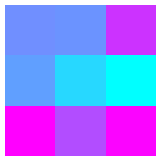

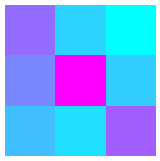

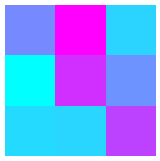

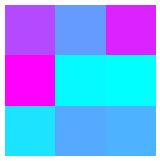

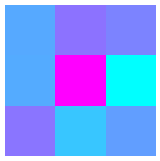

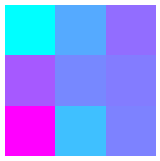

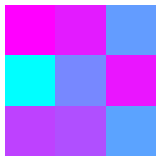

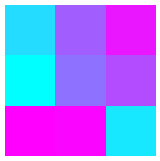

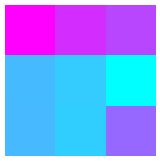

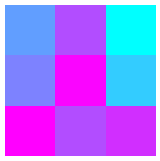

In [120]:
plt.rcParams['figure.dpi'] = 50
plt.rcParams['font.size'] = 50
for i in range(10):
    plt.imshow(weight_np[i], cmap='cool')
    plt.axis("off")
    plt.show()

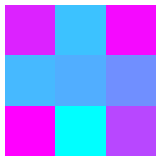

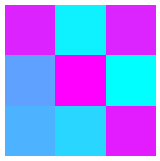

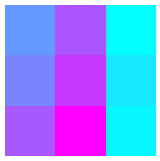

In [134]:
 cnn_random = nn.Conv2d(in_channels=1,
                        out_channels=3,
                        kernel_size=(3, 3),
                        padding=1)
weight = cnn_random.weight
weight_np = weight.cpu().detach().squeeze(1).numpy()
plt.rcParams['figure.dpi'] = 50
plt.rcParams['font.size'] = 50
for i in range(3):
    plt.imshow(weight_np[i], cmap='cool')
    plt.axis("off")
    plt.show()

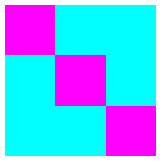

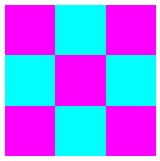

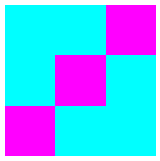

In [136]:
cnn_man = nn.Conv2d(in_channels=1,
                    out_channels=3,
                    kernel_size=(3, 3),
                    padding=1)
cnn_man.weight = torch.nn.Parameter(
    tensor([[[[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]]],
            [[[1, 0, 1],
              [0, 1, 0],
              [1, 0, 1]]],
            [[[0, 0, 1],
              [0, 1, 0],
              [1, 0, 0]]]], dtype=torch.float)
)
weight_np = cnn_man.weight.cpu().detach().squeeze(1).numpy()
plt.rcParams['figure.dpi'] = 50
plt.rcParams['font.size'] = 50
for i in range(3):
    plt.imshow(weight_np[i], cmap='cool')
    plt.axis("off")
    plt.show()

In [140]:
# 使用手动kernel
train_x, test_x, train_y, test_y = train_test_split(x_2, y_1, random_state=123, test_size=0.3)

train_x = train_x.cuda()
train_y = train_y.cuda()
test_x = test_x.cuda()
test_y = test_y.cuda()

class CNN_38810(Module):
    def __init__(self):
        super(CNN_38810, self).__init__()
        self.cnn = nn.Conv2d(in_channels=1,
                             out_channels=3,
                             kernel_size=(3, 3),
                             padding=1)
        # self.cnn.weight = torch.nn.Parameter(
        #     tensor([[[[1, 0, 0],
        #               [0, 1, 0],
        #               [0, 0, 1]]],
        #             [[[1, 0, 1],
        #               [0, 1, 0],
        #               [1, 0, 1]]],
        #             [[[0, 0, 1],
        #               [0, 1, 0],
        #               [1, 0, 0]]]], dtype=torch.float)
        # )
        self.l1 = nn.Linear(3 * 8 * 8, 8 * 8)
        self.l2 = nn.Linear(8 * 8, 10)
    def forward(self, input):
        x = F.relu(self.cnn(input))
        x = x.view(len(x), -1)
        x = F.dropout(x, p=0.2)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        return F.softmax(x, dim=1)

def acc_score(predict_y, real_y, i):
    predict_y_np = predict_y.cpu().detach().numpy()
    predict_y_np_argmax = np.array([np.argmax(t) for t in predict_y_np])
    real_y_np = real_y.cpu().detach().numpy()
    # print(predict_y_np[:20])
    print(i, predict_y_np_argmax[:20])
    print(i, real_y_np[:20])
    return np.sum(real_y_np == predict_y_np_argmax) / len(real_y_np)

model_arr = []
for model_i in range(50):
    model = CNN_38810().cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.03)
    for iter in range(100):
        train_x_predict = model(train_x)
        loss_train = criterion(train_x_predict, train_y)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
    acc_train = acc_score(train_x_predict, train_y, model_i)
    model.eval()
    test_y_predict = model(test_x)
    loss_test = criterion(test_y_predict, test_y)
    acc_test = acc_score(test_y_predict, test_y, model_i)
    model.train()
    loss_train = loss_train.cpu().detach().numpy()
    loss_test = loss_test.cpu().detach().numpy()
    model_arr.append([model, loss_train, loss_test, acc_train, acc_test])
model_pd = pd.DataFrame(model_arr, columns=['model', 'loss_train', 'loss_test', 'acc_train', 'acc_test'])
model_pd

0 [3 2 5 5 0 0 0 0 3 0 8 4 8 0 8 3 5 8 8 2]
0 [3 2 5 5 1 0 0 0 9 9 8 4 8 6 8 3 5 8 8 2]
0 [3 3 4 4 0 3 0 0 7 4 0 0 5 0 0 0 3 0 0 0]
0 [3 3 4 4 1 3 1 0 7 4 0 0 5 1 6 0 3 1 0 6]
1 [3 2 5 5 1 0 0 0 9 9 9 4 0 0 0 3 5 1 0 2]
1 [3 2 5 5 1 0 0 0 9 9 8 4 8 6 8 3 5 8 8 2]
1 [3 3 4 4 1 3 1 0 7 4 0 0 5 1 0 0 3 1 0 0]
1 [3 3 4 4 1 3 1 0 7 4 0 0 5 1 6 0 3 1 0 6]
2 [0 2 5 5 1 0 0 0 0 0 8 0 8 6 8 0 5 8 8 2]
2 [3 2 5 5 1 0 0 0 9 9 8 4 8 6 8 3 5 8 8 2]
2 [0 0 0 0 1 0 1 0 7 0 0 0 5 1 6 0 0 1 0 6]
2 [3 3 4 4 1 3 1 0 7 4 0 0 5 1 6 0 3 1 0 6]
3 [0 0 0 0 1 0 0 0 9 9 0 4 0 6 0 0 0 0 0 0]
3 [3 2 5 5 1 0 0 0 9 9 8 4 8 6 8 3 5 8 8 2]
3 [0 0 4 4 1 0 1 0 0 4 6 0 0 1 6 0 0 1 6 6]
3 [3 3 4 4 1 3 1 0 7 4 0 0 5 1 6 0 3 1 0 6]
4 [3 2 5 5 1 0 0 0 9 9 8 4 8 0 8 3 5 1 8 2]
4 [3 2 5 5 1 0 0 0 9 9 8 4 8 6 8 3 5 8 8 2]
4 [3 3 4 4 1 3 1 0 0 4 0 0 5 1 0 0 3 1 0 0]
4 [3 3 4 4 1 3 1 0 7 4 0 0 5 1 6 0 3 1 0 6]
5 [3 2 5 5 1 0 0 0 9 9 8 4 8 0 8 3 5 8 8 2]
5 [3 2 5 5 1 0 0 0 9 9 8 4 8 6 8 3 5 8 8 2]
5 [3 3 4 4 1 3 1 0 7 4 0 0 5 1 0

,model,loss_train,loss_test,acc_train,acc_test
0,"CNN_38810(\n (cnn): Conv2d(1, 3, kernel_size=...",1.7149011,1.7384094,0.700080,0.675926
1,"CNN_38810(\n (cnn): Conv2d(1, 3, kernel_size=...",1.7153727,1.7379456,0.795545,0.788889
2,"CNN_38810(\n (cnn): Conv2d(1, 3, kernel_size=...",1.8020682,1.8331246,0.692124,0.672222
3,"CNN_38810(\n (cnn): Conv2d(1, 3, kernel_size=...",1.9743781,1.9629368,0.485282,0.512963
4,"CNN_38810(\n (cnn): Conv2d(1, 3, kernel_size=...",1.731773,1.7790586,0.775656,0.742593
5,"CNN_38810(\n (cnn): Conv2d(1, 3, kernel_size=...",1.6311251,1.6830739,0.891806,0.851852
6,"CNN_38810(\n (cnn): Conv2d(1, 3, kernel_size=...",1.7265899,1.7294369,0.694511,0.692593
7,"CNN_38810(\n (cnn): Conv2d(1, 3, kernel_size=...",2.362503,2.3630023,0.098648,0.098148
8,"CNN_38810(\n (cnn): Conv2d(1, 3, kernel_size=...",1.7048621,1.7177106,0.753381,0.744444
9,"CNN_38810(\n (cnn): Conv2d(1, 3, kernel_size=...",1.8169535,1.8400307,0.689737,0.685185
